In [2]:
import pandas as pd

In [4]:
import numpy as np

In [8]:
import matplotlib.pyplot as plt

In [10]:
import seaborn as sns

In [12]:
df = pd.read_csv("Employee.csv")

In [14]:
# Display first few rows
print(df.head())

   Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0  Bachelors         2017  Bangalore            3   34    Male          No   
1  Bachelors         2013       Pune            1   28  Female          No   
2  Bachelors         2014  New Delhi            3   38  Female          No   
3    Masters         2016  Bangalore            3   27    Male          No   
4    Masters         2017       Pune            3   24    Male         Yes   

   ExperienceInCurrentDomain  LeaveOrNot  
0                          0           0  
1                          3           1  
2                          2           0  
3                          5           1  
4                          2           1  


In [16]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64


In [18]:
print("\nStatistical summary:")
print(df.describe(include='all'))


Statistical summary:
        Education  JoiningYear       City  PaymentTier          Age Gender  \
count        4653  4653.000000       4653  4653.000000  4653.000000   4653   
unique          3          NaN          3          NaN          NaN      2   
top     Bachelors          NaN  Bangalore          NaN          NaN   Male   
freq         3601          NaN       2228          NaN          NaN   2778   
mean          NaN  2015.062970        NaN     2.698259    29.393295    NaN   
std           NaN     1.863377        NaN     0.561435     4.826087    NaN   
min           NaN  2012.000000        NaN     1.000000    22.000000    NaN   
25%           NaN  2013.000000        NaN     3.000000    26.000000    NaN   
50%           NaN  2015.000000        NaN     3.000000    28.000000    NaN   
75%           NaN  2017.000000        NaN     3.000000    32.000000    NaN   
max           NaN  2018.000000        NaN     3.000000    41.000000    NaN   

       EverBenched  ExperienceInCurrentDo

In [20]:
print("\nDimensions of the DataFrame:")
print(df.shape)


Dimensions of the DataFrame:
(4653, 9)


In [22]:
print("\nColumn names and data types:")
print(df.dtypes)


Column names and data types:
Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object


In [26]:
# Convert 'object' type columns to 'category' where appropriate
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')

In [28]:
# Verify data types after conversion
df.dtypes

Education                    category
JoiningYear                     int64
City                         category
PaymentTier                     int64
Age                             int64
Gender                       category
EverBenched                  category
ExperienceInCurrentDomain       int64
LeaveOrNot                      int64
dtype: object

In [34]:
# Z-Score normalization for the 'Age' column
# Z = (value - mean) / standard deviation
df['Age_Z'] = (df['Age'] - df['Age'].mean()) / df['Age'].std()

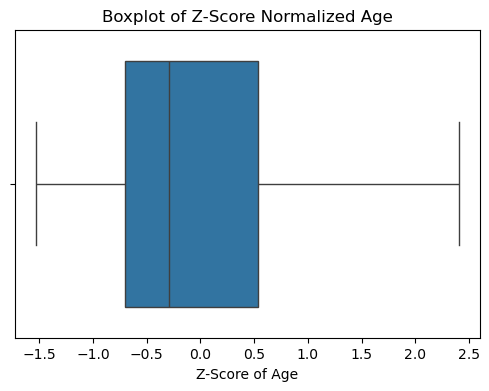

In [36]:
# Plotting the normalized 'Age' column using a boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Age_Z'])  # Boxplot of the normalized Age
plt.title("Boxplot of Z-Score Normalized Age")
plt.xlabel("Z-Score of Age")
plt.show()

In [38]:
# Columns to encode: 'Education', 'City', 'Gender', 'EverBenched'
# drop_first=True removes one dummy variable to avoid multicollinearity (dummy variable trap)

df_encoded = pd.get_dummies(
    df,
    columns=['Education', 'City', 'Gender', 'EverBenched'],
    drop_first=True
)

In [40]:
# Display the first 5 rows of the new encoded DataFrame
df_encoded.head()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Age_Z,Education_Masters,Education_PHD,City_New Delhi,City_Pune,Gender_Male,EverBenched_Yes
0,2017,3,34,0,0,0.954543,False,False,False,False,True,False
1,2013,1,28,3,1,-0.288701,False,False,False,True,False,False
2,2014,3,38,2,0,1.783371,False,False,True,False,False,False
3,2016,3,27,5,1,-0.495908,True,False,False,False,True,False
4,2017,3,24,2,1,-1.117530,True,False,False,True,True,True
